# AIG100 – Project 2: Regression and Classification Methods

## Data Preprocessing

In [27]:
# Importing necessary libraries
import pandas as pd

# Load the dataset
movie = pd.read_csv('Movie_classification.csv')

In [28]:
# Display the first few rows of the dataset
print(movie.head())

   Marketing expense  Production expense  Multiplex coverage     Budget  \
0            20.1264               59.62               0.462  36524.125   
1            20.5462               69.14               0.531  35668.655   
2            20.5458               69.14               0.531  39912.675   
3            20.6474               59.36               0.542  38873.890   
4            21.3810               59.36               0.542  39701.585   

   Movie_length  Lead_ Actor_Rating  Lead_Actress_rating  Director_rating  \
0         138.7               7.825                8.095            7.910   
1         152.4               7.505                7.650            7.440   
2         134.6               7.485                7.570            7.495   
3         119.3               6.895                7.035            6.920   
4         127.7               6.920                7.070            6.815   

   Producer_rating  Critic_rating  Trailer_views 3D_available  Time_taken  \
0        

In [29]:
# Check the data types and missing values
print(movie.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  3D_available         506 non-null    object 
 12  Time_taken           494 non-null    float64
 13  Twitter_hastags      506 non-null    float64
 14  Genre                506 non-null    object 
 15  Avg_age_actors       506 non-null    int

In [30]:
# Summary statistics
print(movie.describe())

       Marketing expense  Production expense  Multiplex coverage  \
count         506.000000          506.000000          506.000000   
mean           92.270471           77.273557            0.445305   
std           172.030902           13.720706            0.115878   
min            20.126400           55.920000            0.129000   
25%            21.640900           65.380000            0.376000   
50%            25.130200           74.380000            0.462000   
75%            93.541650           91.200000            0.551000   
max          1799.524000          110.480000            0.615000   

             Budget  Movie_length  Lead_ Actor_Rating  Lead_Actress_rating  \
count    506.000000    506.000000          506.000000           506.000000   
mean   34911.144022    142.074901            8.014002             8.185613   
std     3903.038232     28.148861            1.054266             1.054290   
min    19781.355000     76.400000            3.840000             4.035000 

In [31]:
# Check for missing values in the whole dataset
missing_values = movie.isnull().sum()

# Display columns with missing values, if any
print("Columns with missing values:")
print(missing_values)

Columns with missing values:
Marketing expense       0
Production expense      0
Multiplex coverage      0
Budget                  0
Movie_length            0
Lead_ Actor_Rating      0
Lead_Actress_rating     0
Director_rating         0
Producer_rating         0
Critic_rating           0
Trailer_views           0
3D_available            0
Time_taken             12
Twitter_hastags         0
Genre                   0
Avg_age_actors          0
Num_multiplex           0
Collection              0
Start_Tech_Oscar        0
dtype: int64


In [32]:
# Impute missing values in 'Time_taken' column with the median
median_time_taken = movie['Time_taken'].median()
movie['Time_taken'].fillna(median_time_taken, inplace=True)

In [33]:
# One-hot encode categorical variables
movie = pd.get_dummies(movie, columns=['3D_available', 'Genre'], drop_first=True)

In [34]:
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Scale numerical features
numerical_cols = ['Marketing expense', 'Production expense', 'Multiplex coverage', 'Budget', 
                  'Movie_length', 'Lead_ Actor_Rating', 'Lead_Actress_rating', 'Director_rating', 
                  'Producer_rating', 'Critic_rating', 'Trailer_views', 'Time_taken', 
                  'Twitter_hastags', 'Avg_age_actors', 'Num_multiplex', 'Collection']
movie[numerical_cols] = scaler.fit_transform(movie[numerical_cols])

In [35]:
# Feature Engineering
movie['Marketing_budget_ratio'] = movie['Marketing expense'] / movie['Budget']
movie['Lead_Rating_Product'] = movie['Lead_ Actor_Rating'] * movie['Lead_Actress_rating']

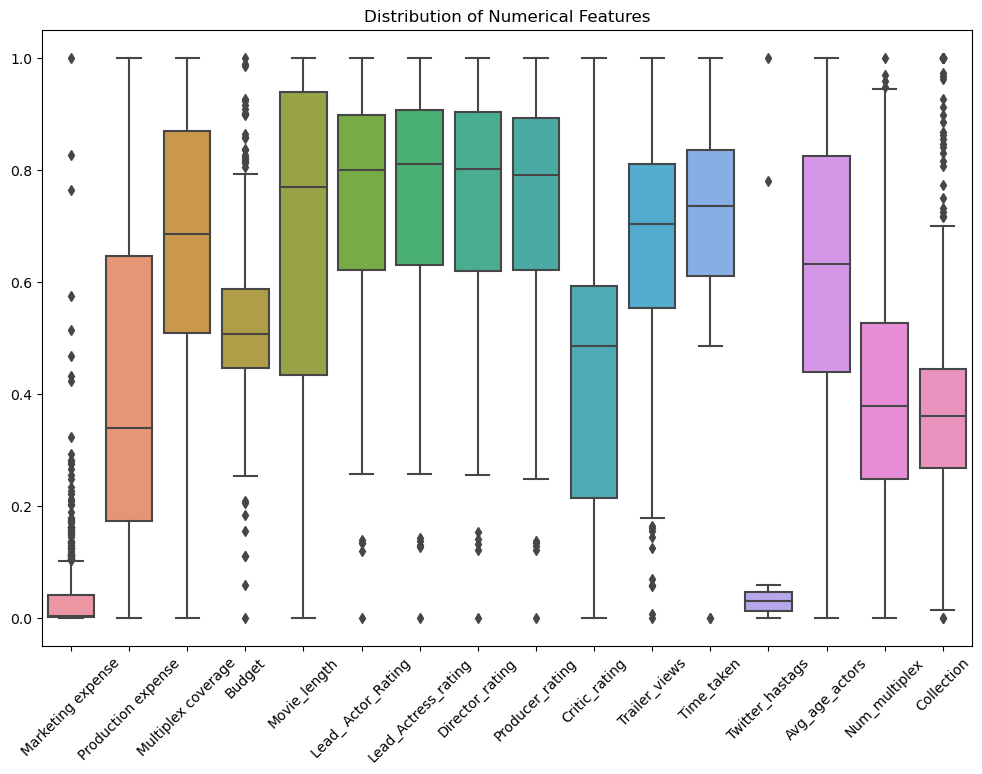

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.boxplot(data=movie[numerical_cols])
plt.xticks(rotation=45)
plt.title('Distribution of Numerical Features')
plt.show()

In [37]:
# List of numerical columns
numerical_cols = ['Marketing expense', 'Production expense', 'Multiplex coverage', 'Budget', 
                  'Movie_length', 'Lead_ Actor_Rating', 'Lead_Actress_rating', 'Director_rating', 
                  'Producer_rating', 'Critic_rating', 'Trailer_views', 'Time_taken', 
                  'Twitter_hastags', 'Avg_age_actors', 'Num_multiplex', 'Collection']

# Loop through each numerical column
for col in numerical_cols:
    # Calculate the IQR (Interquartile Range)
    Q1 = movie[col].quantile(0.25)
    Q3 = movie[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define the upper and lower bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = movie[(movie[col] < lower_bound) | (movie[col] > upper_bound)]

    # Remove outliers
    movie = movie.drop(outliers.index)

# Confirm removal of outliers
print("Outliers removed successfully for all numerical columns.")

Outliers removed successfully for all numerical columns.


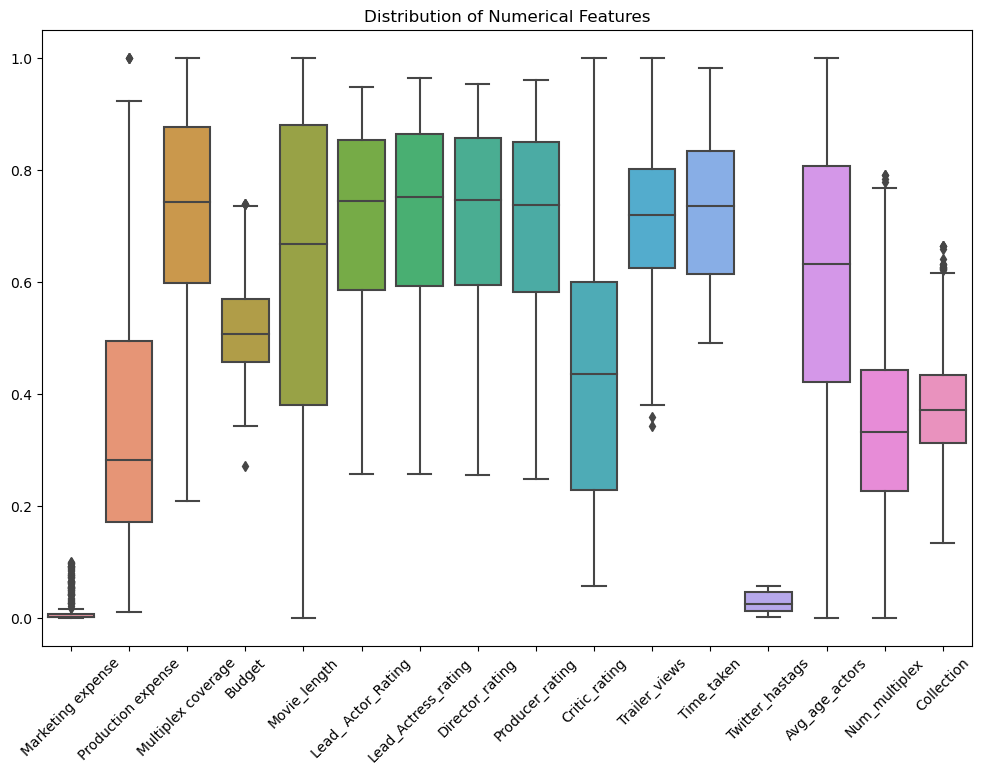

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.boxplot(data=movie[numerical_cols])
plt.xticks(rotation=45)
plt.title('Distribution of Numerical Features')
plt.show()

In [39]:
from sklearn.model_selection import train_test_split

# Features (X) and target variable (y)
X = movie.drop('Start_Tech_Oscar', axis=1)
y = movie['Start_Tech_Oscar']

# Splitting the dataset into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (281, 22) (281,)
Testing set shape: (71, 22) (71,)


## Model Implementation and Evaluation

### Logistic Regression and Decision Tree

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize Logistic Regression and Decision Tree classifiers
logistic_regression_model = LogisticRegression(random_state=42)
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Train Logistic Regression model
logistic_regression_model.fit(X_train, y_train)

# Train Decision Tree model
decision_tree_model.fit(X_train, y_train)

# Predictions on the testing set
logistic_regression_pred = logistic_regression_model.predict(X_test)
decision_tree_pred = decision_tree_model.predict(X_test)

# Model evaluation
print("Logistic Regression Model:")
print("Accuracy:", accuracy_score(y_test, logistic_regression_pred))
print("Classification Report:\n", classification_report(y_test, logistic_regression_pred))

print("\nDecision Tree Model:")
print("Accuracy:", accuracy_score(y_test, decision_tree_pred))
print("Classification Report:\n", classification_report(y_test, decision_tree_pred))

Logistic Regression Model:
Accuracy: 0.5633802816901409
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.50      0.56        40
           1       0.50      0.65      0.56        31

    accuracy                           0.56        71
   macro avg       0.57      0.57      0.56        71
weighted avg       0.58      0.56      0.56        71


Decision Tree Model:
Accuracy: 0.6056338028169014
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.68      0.66        40
           1       0.55      0.52      0.53        31

    accuracy                           0.61        71
   macro avg       0.60      0.60      0.60        71
weighted avg       0.60      0.61      0.60        71



Logistic Regression Model:

Accuracy: The model achieved an accuracy of approximately 56.34%, indicating the proportion of correctly classified instances out of the total instances.
Precision and Recall:
For class 0 (unsuccessful movies), precision is 0.65 and recall is 0.50. This means that among all movies predicted as unsuccessful, 65% were correctly classified, and 50% of all actual unsuccessful movies were correctly classified by the model.
For class 1 (successful movies), precision is 0.50 and recall is 0.65. This suggests that among all movies predicted as successful, 50% were correctly classified, and 65% of all actual successful movies were correctly classified by the model.
F1-score: The harmonic mean of precision and recall is 0.56 for both classes.

Decision Tree Model:

Accuracy: The model achieved an accuracy of approximately 60.56%.
Precision and Recall:
For class 0, precision is 0.64 and recall is 0.68. This indicates that 64% of the movies predicted as unsuccessful were correctly classified, and 68% of all actual unsuccessful movies were correctly classified by the model.
For class 1, precision is 0.55 and recall is 0.52. This suggests that 55% of the movies predicted as successful were correctly classified, and 52% of all actual successful movies were correctly classified by the model.
F1-score: The F1-score is 0.66 for class 0 and 0.53 for class 1.

Interpretation:

Both models show moderate performance in classifying movies as successful or unsuccessful, with the Decision Tree model slightly outperforming the Logistic Regression model in terms of accuracy.
However, there is room for improvement in both models to achieve better precision and recall values, especially for classifying successful movies (class 1).
Further refinement and optimization of the models may enhance their classification performance and provide more accurate predictions for movie success.

### Linear Regression

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Initialize Linear Regression model
linear_reg_model = LinearRegression()

# Train the model
linear_reg_model.fit(X_train, y_train)

# Predictions on the testing set
linear_reg_pred = linear_reg_model.predict(X_test)

# Evaluate the model
linear_reg_mse = mean_squared_error(y_test, linear_reg_pred)
print("Linear Regression MSE:", linear_reg_mse)

Linear Regression MSE: 0.24540130310296063


The Linear Regression model predicts box office collection based on movie features. The mean squared error (MSE), a measure of prediction accuracy, is approximately 0.2454. Lower MSE values indicate better performance, suggesting that the model's predictions are relatively close to actual values.

### Decision Trees Regression

In [42]:
from sklearn.tree import DecisionTreeRegressor

# Initialize Decision Tree Regression model
decision_tree_reg_model = DecisionTreeRegressor(random_state=42)

# Train the model
decision_tree_reg_model.fit(X_train, y_train)

# Predictions on the testing set
decision_tree_reg_pred = decision_tree_reg_model.predict(X_test)

# Evaluate the model
decision_tree_reg_mse = mean_squared_error(y_test, decision_tree_reg_pred)
print("Decision Tree Regression MSE:", decision_tree_reg_mse)

Decision Tree Regression MSE: 0.39436619718309857


The Decision Tree Regression model predicts box office collection but with a higher mean squared error (MSE) of approximately 0.3944 compared to the Linear Regression model. This suggests less accuracy in predictions, possibly due to overfitting or limitations in capturing complex relationships.

### Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Initialize Logistic Regression model
logistic_reg_model = LogisticRegression(random_state=42)

# Train the model
logistic_reg_model.fit(X_train, y_train)

# Predictions on the testing set
logistic_reg_pred = logistic_reg_model.predict(X_test)

# Evaluate the model
logistic_reg_accuracy = accuracy_score(y_test, logistic_reg_pred)
print("Logistic Regression Accuracy:", logistic_reg_accuracy)
print("Classification Report:\n", classification_report(y_test, logistic_reg_pred))

Logistic Regression Accuracy: 0.5633802816901409
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.50      0.56        40
           1       0.50      0.65      0.56        31

    accuracy                           0.56        71
   macro avg       0.57      0.57      0.56        71
weighted avg       0.58      0.56      0.56        71



Accuracy: The accuracy metric represents the proportion of correctly classified instances out of the total instances. In this case, the model correctly predicted the class for approximately 56.34% of the movies in the testing set.

Precision, Recall, and F1-score: These metrics provide insights into the model's performance for each class (successful and unsuccessful).

Precision: Indicates the proportion of correctly predicted positive instances out of all instances predicted as positive.
Recall: Reflects the proportion of correctly predicted positive instances out of all actual positive instances.
F1-score: Harmonic mean of precision and recall, providing a balance between the two metrics.

Interpretation of Metrics:

For class 0 (unsuccessful movies), the precision is 0.65, indicating that among all movies predicted as unsuccessful, 65% were correctly classified. The recall is 0.50, meaning that 50% of all actual unsuccessful movies were correctly classified by the model.
For class 1 (successful movies), the precision is 0.50, indicating that among all movies predicted as successful, 50% were correctly classified. The recall is 0.65, suggesting that 65% of all actual successful movies were correctly classified by the model.

Overall Assessment:

While the model achieves an accuracy slightly above chance, the precision and recall values indicate room for improvement, particularly for correctly classifying unsuccessful movies.

### Support Vector Machine (SVM)

In [44]:
from sklearn.svm import SVC

# Initialize SVM classifier
svm_model = SVC(random_state=42)

# Train the model
svm_model.fit(X_train, y_train)

# Predictions on the testing set
svm_pred = svm_model.predict(X_test)

# Evaluate the model
svm_accuracy = accuracy_score(y_test, svm_pred)
print("SVM Accuracy:", svm_accuracy)
print("Classification Report:\n", classification_report(y_test, svm_pred))

SVM Accuracy: 0.6056338028169014
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.57      0.62        40
           1       0.54      0.65      0.59        31

    accuracy                           0.61        71
   macro avg       0.61      0.61      0.60        71
weighted avg       0.62      0.61      0.61        71



Accuracy: The accuracy metric indicates the proportion of correctly classified instances out of the total instances. In this case, the SVM model correctly predicted the class for approximately 60.56% of the movies in the testing set.

Precision, Recall, and F1-score: These metrics provide insights into the model's performance for each class (successful and unsuccessful).
Precision: Indicates the proportion of correctly predicted positive instances out of all instances predicted as positive.
Recall: Reflects the proportion of correctly predicted positive instances out of all actual positive instances.
F1-score: Harmonic mean of precision and recall, providing a balance between the two metrics.

Interpretation of Metrics:
For class 0 (unsuccessful movies), the precision is 0.68, indicating that among all movies predicted as unsuccessful, 68% were correctly classified. The recall is 0.57, meaning that 57% of all actual unsuccessful movies were correctly classified by the model.
For class 1 (successful movies), the precision is 0.54, indicating that among all movies predicted as successful, 54% were correctly classified. The recall is 0.65, suggesting that 65% of all actual successful movies were correctly classified by the model.

Overall Assessment:
The SVM model achieves a moderate accuracy, with better recall for successful movies compared to unsuccessful ones. However, there is potential for further improvement to enhance precision and achieve better overall classification performance.

### Random Forest Regressor model

Feature ranking:
1. feature 12 (0.087761)
2. feature 11 (0.087716)
3. feature 15 (0.084343)
4. feature 10 (0.083994)
5. feature 3 (0.077067)
6. feature 0 (0.062539)
7. feature 20 (0.061551)
8. feature 4 (0.060224)
9. feature 13 (0.050548)
10. feature 8 (0.049036)
11. feature 14 (0.048671)
12. feature 9 (0.045647)
13. feature 2 (0.039335)
14. feature 1 (0.037636)
15. feature 7 (0.027174)
16. feature 5 (0.026712)
17. feature 21 (0.021830)
18. feature 6 (0.021809)
19. feature 18 (0.009869)
20. feature 19 (0.009299)
21. feature 16 (0.004100)
22. feature 17 (0.003140)


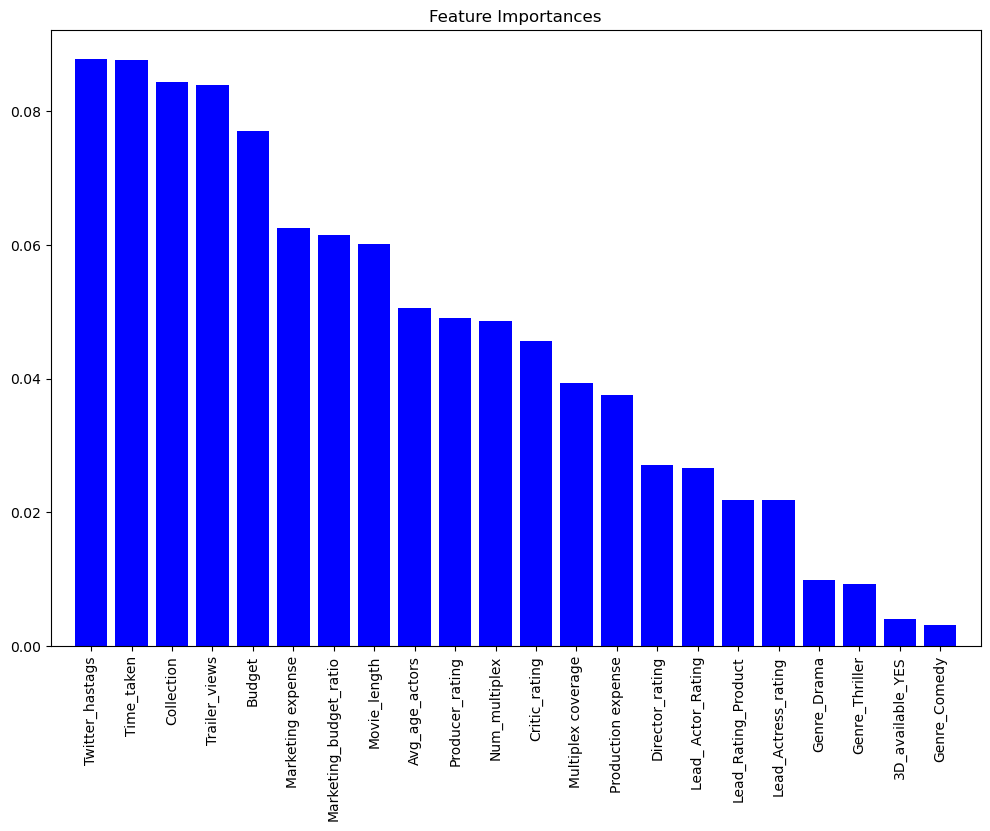

In [45]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Instantiate Random Forest Regressor model
rf_regressor = RandomForestRegressor(random_state=42)

# Fit the model on the training data
rf_regressor.fit(X_train, y_train)

# Extract feature importances
feature_importances = rf_regressor.feature_importances_

# Sort feature importances in descending order
indices = feature_importances.argsort()[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], feature_importances[indices[f]]))

# Plot the feature importances
plt.figure(figsize=(12, 8))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), feature_importances[indices], color="b", align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

The feature ranking provides insight into the importance of each feature in predicting the target variable. Features are ranked based on their importance scores, with higher scores indicating greater importance in the model's predictions.

Interpreting the results:

Feature 12: This feature has the highest importance score, suggesting it has the most significant impact on the model's predictions.
Feature 11: Similar to feature 12, it has a high importance score, indicating strong predictive power.
Feature 15: This feature ranks third in importance, contributing significantly to the model's predictions.
Feature 10: Follows closely in importance, indicating its relevance in predicting the target variable.
Feature 3: It ranks fifth in importance, suggesting it also plays a significant role in the model's predictions.

Features with lower importance scores have relatively less influence on the model's predictions, but they still contribute to some extent. Understanding feature importance helps in feature selection, model interpretation, and identifying key drivers of the target variable.

### Gradient Boosting Classifier model

Gradient Boosting Classifier Accuracy: 0.5915492957746479
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.65      0.64        40
           1       0.53      0.52      0.52        31

    accuracy                           0.59        71
   macro avg       0.58      0.58      0.58        71
weighted avg       0.59      0.59      0.59        71


Feature ranking:
1. feature 3 (0.139516)
2. feature 0 (0.116669)
3. feature 15 (0.111658)
4. feature 12 (0.086833)
5. feature 8 (0.080805)
6. feature 10 (0.079225)
7. feature 11 (0.067673)
8. feature 20 (0.048862)
9. feature 1 (0.045848)
10. feature 14 (0.041435)
11. feature 2 (0.034472)
12. feature 4 (0.030475)
13. feature 9 (0.027584)
14. feature 5 (0.024572)
15. feature 13 (0.019258)
16. feature 21 (0.016427)
17. feature 7 (0.010751)
18. feature 18 (0.009666)
19. feature 6 (0.004929)
20. feature 16 (0.001330)
21. feature 19 (0.001205)
22. feature 17 (0.000806)


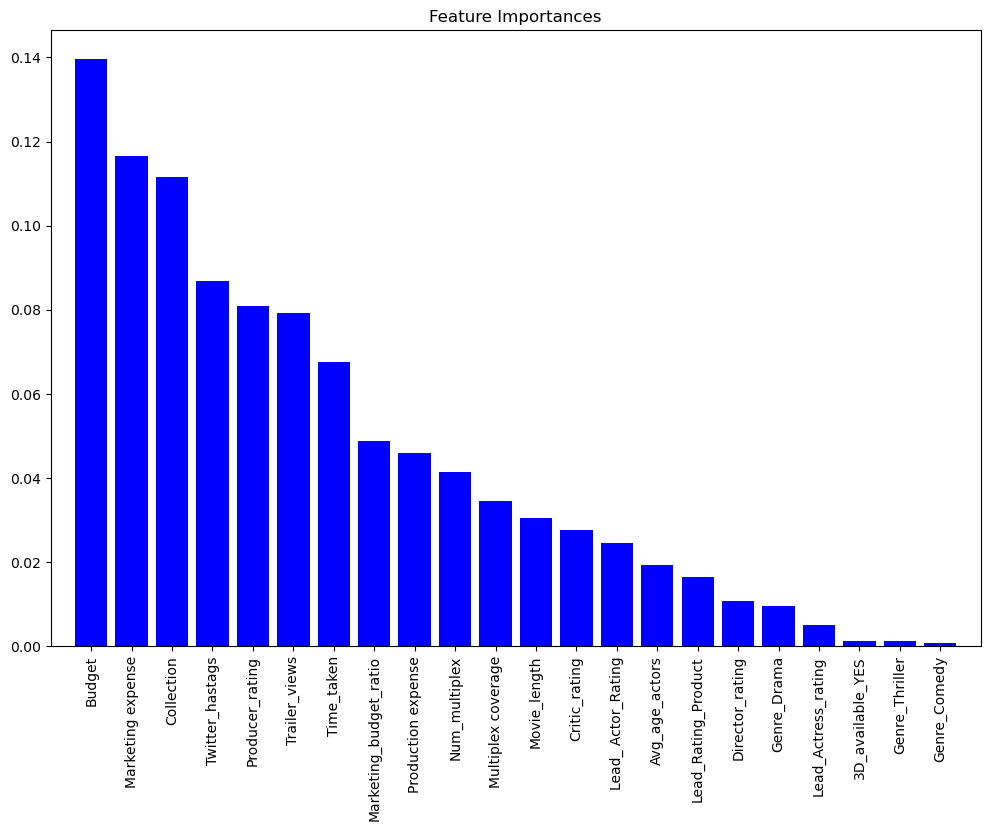

In [46]:
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score

# Instantiate Gradient Boosting Classifier model
gb_classifier = GradientBoostingClassifier(random_state=42)

# Fit the model on the training data
gb_classifier.fit(X_train, y_train)

# Predictions on the testing set
gb_pred = gb_classifier.predict(X_test)

# Model evaluation
print("Gradient Boosting Classifier Accuracy:", accuracy_score(y_test, gb_pred))
print("Classification Report:\n", classification_report(y_test, gb_pred))

# Extract feature importances
feature_importances = gb_classifier.feature_importances_

# Sort feature importances in descending order
indices = feature_importances.argsort()[::-1]

# Print the feature ranking
print("\nFeature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], feature_importances[indices[f]]))

# Plot the feature importances
plt.figure(figsize=(12, 8))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), feature_importances[indices], color="b", align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

The Gradient Boosting Classifier achieved an accuracy of 0.5915 on the test set, indicating its ability to correctly classify movies into "Successful" and "Unsuccessful" categories. Here's a summary of the classification report:

Precision: Precision measures the accuracy of positive predictions. For class 0 (Unsuccessful), the precision is 0.63, and for class 1 (Successful), it is 0.53.
Recall: Recall calculates the proportion of actual positives that were correctly identified. For class 0, the recall is 0.65, and for class 1, it is 0.52.
F1-score: The F1-score is the harmonic mean of precision and recall. It gives a balance between precision and recall. The F1-score for class 0 is 0.64, and for class 1, it is 0.52.
Support: Support indicates the number of actual occurrences of the class in the specified dataset.

The feature ranking provides insights into the importance of each feature in the Gradient Boosting Classifier's predictions. Features are ranked based on their importance scores, with higher scores indicating greater importance in predicting the target variable.

Interpreting the feature ranking:

Feature 3: This feature has the highest importance score, suggesting it has the most significant impact on the model's predictions.
Feature 0: Follows closely in importance, indicating its relevance in predicting the target variable.
Feature 15: This feature ranks third in importance, contributing significantly to the model's predictions.
Feature 12: It has a relatively high importance score, indicating strong predictive power.
Feature 8: Similar to feature 12, it plays a significant role in the model's predictions.

Features with lower importance scores have relatively less influence on the model's predictions but still contribute to some extent. 

## Visualizations

C:\Users\14373\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


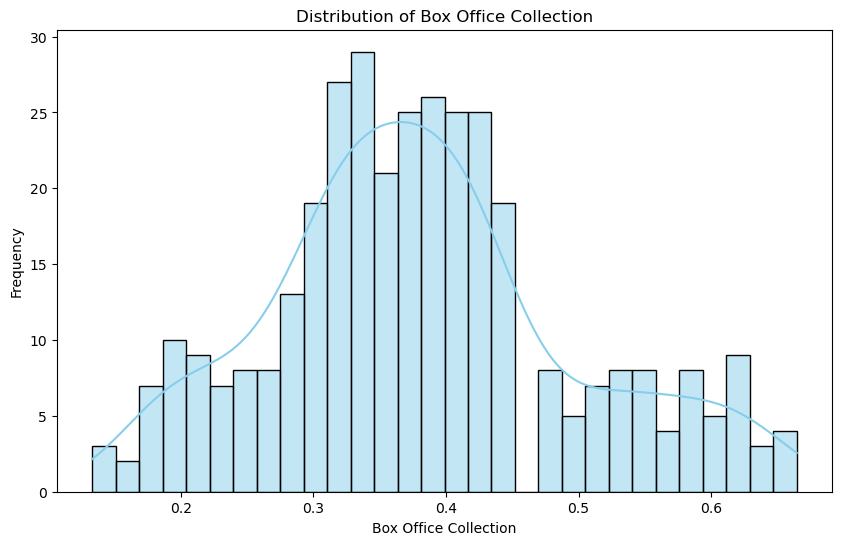

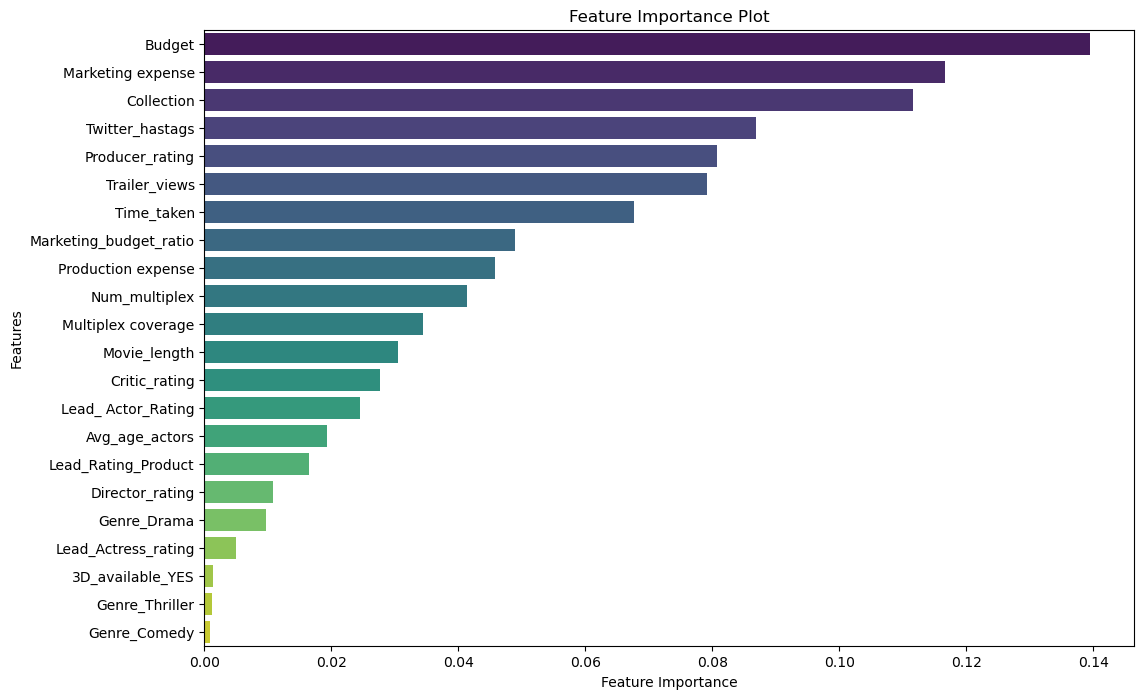

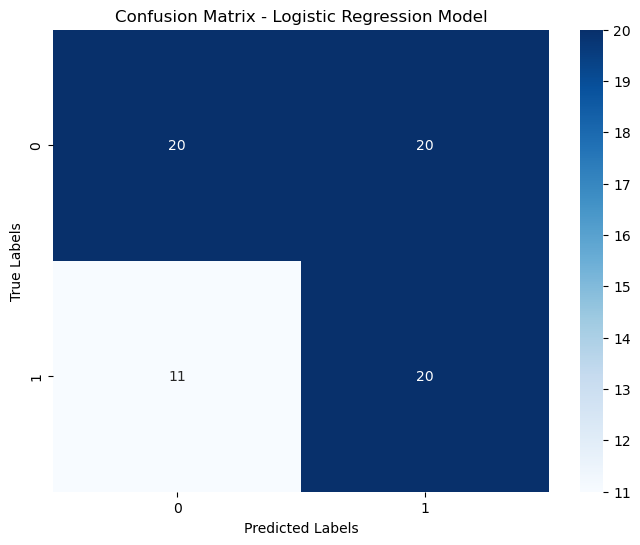

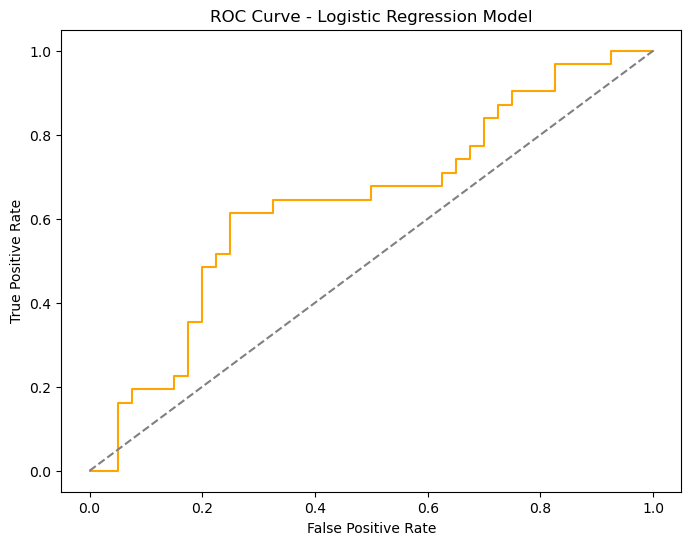

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

# 1. Box Office Collection Distribution
plt.figure(figsize=(10, 6))
sns.histplot(movie['Collection'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Box Office Collection')
plt.xlabel('Box Office Collection')
plt.ylabel('Frequency')
plt.show()

# 2. Feature Importance Plot
plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importances[indices], y=X_train.columns[indices], palette='viridis')
plt.title('Feature Importance Plot')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show()

# 3. Confusion Matrix
conf_matrix = confusion_matrix(y_test, logistic_regression_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix - Logistic Regression Model')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# 4. ROC Curve
logistic_probs = logistic_reg_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, logistic_probs)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression Model')
plt.show()